<a href="https://colab.research.google.com/github/MarianoNCrz/Proyects/blob/main/Ansible_Health_Data_Analyst_Assessment_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analyst Assessment Task**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# First I'm uploading both files (yob2007.txt y yob2020.txt)

Links:

yob2007.txt
https://drive.google.com/file/d/1FvQjp7iSChaHiMkQlnSe3BVjhrAt5zeK/view?usp=drive_link


yob2020.txt
https://drive.google.com/file/d/1t7szrLXgzwXoZZtGdSD_lR5jm9CyfTJl/view?usp=drive_link



In [24]:
df_2007 = pd.read_csv('/content/yob2007.txt', names=['Name', 'Sex', 'Count'], header=None)
df_2020 = pd.read_csv('/content/yob2020.txt', names=['Name', 'Sex', 'Count'], header=None)

# Control

In [25]:
print(df_2007.head())
print(df_2020.head())

       Name Sex  Count
0     Emily   F  19366
1  Isabella   F  19143
2      Emma   F  18388
3       Ava   F  18053
4   Madison   F  17968
        Name Sex  Count
0     Olivia   F  17682
1       Emma   F  15714
2        Ava   F  13197
3  Charlotte   F  13097
4     Sophia   F  13095


# I'm adding the 'Rank' column for 2007 and 2020

In [26]:

df_2007['Rank'] = df_2007.groupby('Sex')['Count'].rank(ascending=False, method='first')
df_2020['Rank'] = df_2020.groupby('Sex')['Count'].rank(ascending=False, method='first')

Control

In [27]:
print(df_2007.head())
print(df_2020.head())

       Name Sex  Count  Rank
0     Emily   F  19366   1.0
1  Isabella   F  19143   2.0
2      Emma   F  18388   3.0
3       Ava   F  18053   4.0
4   Madison   F  17968   5.0
        Name Sex  Count  Rank
0     Olivia   F  17682   1.0
1       Emma   F  15714   2.0
2        Ava   F  13197   3.0
3  Charlotte   F  13097   4.0
4     Sophia   F  13095   5.0


# **Top 10 of each gender in 2007**

In [28]:
top10_2007 = df_2007[df_2007['Rank'] <= 10]

In [29]:
print(top10_2007)

              Name Sex  Count  Rank
0            Emily   F  19366   1.0
1         Isabella   F  19143   2.0
2             Emma   F  18388   3.0
3              Ava   F  18053   4.0
4          Madison   F  17968   5.0
5           Sophia   F  17031   6.0
6           Olivia   F  16588   7.0
7          Abigail   F  15476   8.0
8           Hannah   F  13322   9.0
9        Elizabeth   F  13070  10.0
20582        Jacob   M  24308   1.0
20583      Michael   M  22024   2.0
20584        Ethan   M  21039   3.0
20585       Joshua   M  20667   4.0
20586       Daniel   M  20264   5.0
20587  Christopher   M  20029   6.0
20588      Anthony   M  19637   7.0
20589      William   M  18894   8.0
20590      Matthew   M  18753   9.0
20591       Andrew   M  18460  10.0


# **I combine it with the 2020 data to see how things changed**

In [30]:
merged = top10_2007.merge(
    df_2020[['Name', 'Sex', 'Rank']], on=['Name', 'Sex'], how='left', suffixes=('_2007', '_2020')
    )

In [31]:
print(merged)

           Name Sex  Count  Rank_2007  Rank_2020
0         Emily   F  19366        1.0       18.0
1      Isabella   F  19143        2.0        7.0
2          Emma   F  18388        3.0        2.0
3           Ava   F  18053        4.0        3.0
4       Madison   F  17968        5.0       23.0
5        Sophia   F  17031        6.0        5.0
6        Olivia   F  16588        7.0        1.0
7       Abigail   F  15476        8.0       12.0
8        Hannah   F  13322        9.0       39.0
9     Elizabeth   F  13070       10.0       16.0
10        Jacob   M  24308        1.0       15.0
11      Michael   M  22024        2.0       12.0
12        Ethan   M  21039        3.0       13.0
13       Joshua   M  20667        4.0       53.0
14       Daniel   M  20264        5.0       14.0
15  Christopher   M  20029        6.0       47.0
16      Anthony   M  19637        7.0       41.0
17      William   M  18894        8.0        5.0
18      Matthew   M  18753        9.0       30.0
19       Andrew   M 

# Those who didn't make the top 100

In [32]:
fallen_names = merged[merged['Rank_2020'] > 100]

In [33]:
print(fallen_names)

Empty DataFrame
Columns: [Name, Sex, Count, Rank_2007, Rank_2020]
Index: []


# **Visualization**

Option A:
The graph isn't displaying because 'fallen_names' is empty, so matplotlib has no bars to draw.

This isn't a bug; there's simply no data that meets the filter ('Rank_2020 > 100').

In [37]:
if not fallen_names.empty:
    plt.figure(figsize=(10,6))
    plt.barh(fallen_names['Name'], fallen_names['Rank_2020'], color='salmon')
    plt.xlabel('Rank in 2020 (higher = less popular)')
    plt.title('Names from 2007 Top 10 that fell outside the Top 100 in 2020')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No top 10 names from 2007 fell outside the top 100 in 2020.")

No top 10 names from 2007 fell outside the top 100 in 2020.


Option B:
Visualize names that declined the most

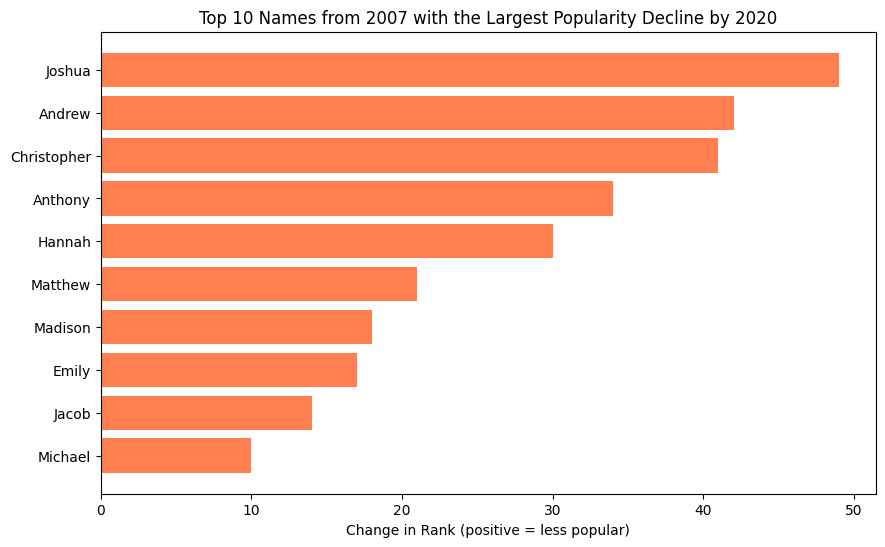

In [39]:
merged['Change'] = merged['Rank_2020'] - merged['Rank_2007']

top_declines = merged.sort_values('Change', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_declines['Name'], top_declines['Change'], color='coral')
plt.xlabel('Change in Rank (positive = less popular)')
plt.title('Top 10 Names from 2007 with the Largest Popularity Decline by 2020')
plt.gca().invert_yaxis()
plt.show()

# **Methodology**
I used the official U.S. Social Security Administration dataset, which contains the number of births by name and gender for each year.

Loaded the 2007 and 2020 datasets into Pandas DataFrames.

Ranked each name by its frequency within gender groups.

Selected the top 10 male and female names from 2007.

Merged those names with their 2020 rankings.

Filtered names that ranked below 100 in 2020 to identify those that significantly decreased in popularity.

# Observation:
None of the top 10 male or female names from 2007 fell outside the top 100 by 2020.
However, some names — such as Hannah and Madison — showed notable declines in ranking.
This indicates that while naming trends evolve over time, the most popular names tend to remain within the upper range of rankings for at least a decade.

Notebook by Mariano Cruz – Data Analyst Assessment (Ansible Health)